# Clustering with scikit-learn

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import utils
import pandas as pd
import numpy as np
from itertools import cycle,islice
import matplotlib.pyplot as plt
from pandas.tools.plotting import parallel_coordinates

In [5]:
data = pd.read_csv('minute_weather.csv')

In [6]:
data.shape

(1587257, 13)

In [9]:
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


## Data Sampling

In [12]:
sampled_df = data[(data['rowID']%10) == 0 ]
sampled_df.shape

(158726, 13)

## Statistics

In [15]:
sampled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937509,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [19]:
sampled_df[sampled_df['rain_accumulation'] == 0].shape

(157812, 13)

In [22]:
sampled_df[sampled_df['rain_duration'] == 0].shape

(157237, 13)

# Drop rows

In [24]:
del sampled_df['rain_accumulation']
del sampled_df['rain_duration']

In [25]:
sampled_df = sampled_df.dropna()

In [28]:
sampled_df.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,60.5
10,10,2011-09-10 00:10:49,912.3,62.24,144.0,1.2,167.0,1.8,115.0,0.6,38.5
20,20,2011-09-10 00:20:49,912.2,63.32,100.0,2.0,122.0,2.5,91.0,1.5,58.3
30,30,2011-09-10 00:30:49,912.2,62.60,91.0,2.0,103.0,2.4,71.0,1.4,57.9
40,40,2011-09-10 00:40:49,912.2,64.04,81.0,2.6,88.0,2.9,68.0,1.4,57.4


In [29]:
sampled_df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

In [30]:
features = ['air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed','relative_humidity']

In [31]:
select_df = sampled_df[features]

In [32]:
select_df.head()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,60.5
10,912.3,62.24,144.0,1.2,38.5
20,912.2,63.32,100.0,2.0,58.3
30,912.2,62.60,91.0,2.0,57.9
40,912.2,64.04,81.0,2.6,57.4


In [33]:
X = StandardScaler().fit_transform(select_df)

In [35]:
X.shape

(158680, 5)

In [36]:
X[:5,:]

array([[-1.48456281,  0.24544455, -0.68385323, -0.76555283,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, -0.76555283, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, -0.37675365,  0.40839371],
       [-1.51733167,  0.06289616, -0.74682691, -0.37675365,  0.39313105],
       [-1.51733167,  0.18459509, -0.85178304, -0.08515426,  0.37405273]])

## Use k-Means Clustering

In [39]:
kmeans = KMeans(n_clusters = 12)
model = kmeans.fit(X)

In [70]:
type(model),type(kmeans)

(sklearn.cluster.k_means_.KMeans, sklearn.cluster.k_means_.KMeans)

In [40]:
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [43]:
centers = model.cluster_centers_

In [46]:
centers

array([[ 0.93276983,  0.02373038,  0.78298386, -0.52606035, -0.75714307],
       [-0.92409045, -1.20195548,  0.35587233, -0.03527285,  1.4556685 ],
       [ 0.21558769, -0.82058859, -1.18518163, -0.57754729,  0.87856298],
       [-1.45425518, -1.41786346,  0.3809692 ,  1.95638686,  1.51075123],
       [ 0.03244295,  1.03643752,  0.39859606,  0.4204652 , -0.34214421],
       [ 1.22661032, -0.28504683, -1.13535202,  2.06985188, -1.14523585],
       [-0.73979347,  0.26517011,  0.13442148, -0.5042832 ,  0.0762298 ],
       [-0.7833922 , -0.17384355,  0.41849223,  1.37636723,  0.27099764],
       [ 1.36369847, -0.05116556, -1.18904959, -0.20088842, -0.98191234],
       [-0.16697486,  0.91071064, -1.26389525, -0.58218881, -0.67567315],
       [-0.12462119,  1.15515564,  1.30776695, -0.67222495, -0.77981652],
       [ 0.50192991, -1.02287027,  0.83695461, -0.34488269,  1.12212202]])

# Plots

In [60]:
def pd_centres(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('prediction')
    # zip with a column called 'prediction' (index)
    z = [np.append(A, index) for index, A in enumerate(centers)]
    # Convert to pandas data frame for plotting
    P = pd.DataFrame(z, columns = colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

In [61]:
def parallel_plot(data):
    my_colors = list(islice(cycle(['b','r','g', 'y', 'k']),None, len(data)))
    plt.figure(figsize = (15,8)).gca().axes.set_ylim([-3,+3])
    parallel_coordinates(data, 'prediction', color = my_colors, marker = 'o')

In [62]:
P = pd_centres(features,centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,relative_humidity,prediction
0,0.932770,0.023730,0.782984,-0.526060,-0.757143,0
1,-0.924090,-1.201955,0.355872,-0.035273,1.455669,1
2,0.215588,-0.820589,-1.185182,-0.577547,0.878563,2
3,-1.454255,-1.417863,0.380969,1.956387,1.510751,3
4,0.032443,1.036438,0.398596,0.420465,-0.342144,4
5,1.226610,-0.285047,-1.135352,2.069852,-1.145236,5
6,-0.739793,0.265170,0.134421,-0.504283,0.076230,6
7,-0.783392,-0.173844,0.418492,1.376367,0.270998,7
8,1.363698,-0.051166,-1.189050,-0.200888,-0.981912,8
9,-0.166975,0.910711,-1.263895,-0.582189,-0.675673,9


# Dry Days

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  after removing the cwd from sys.path.


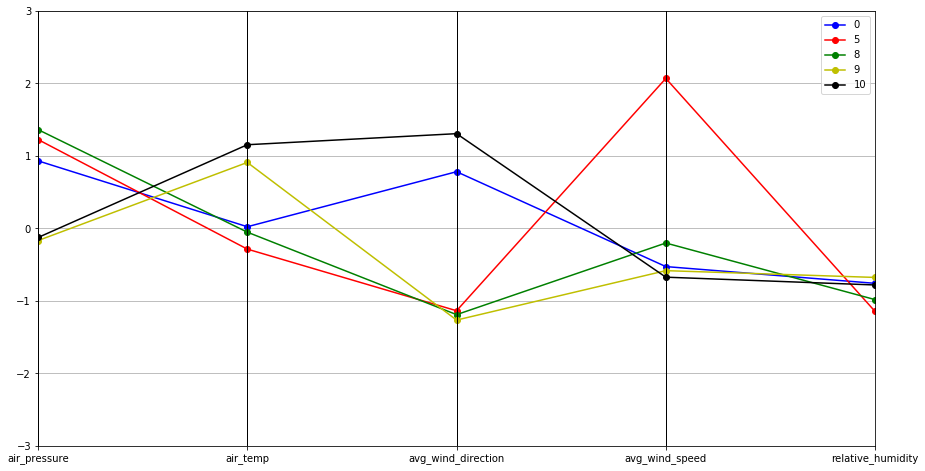

In [63]:
parallel_plot(P[P['relative_humidity'] < -0.5])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  after removing the cwd from sys.path.


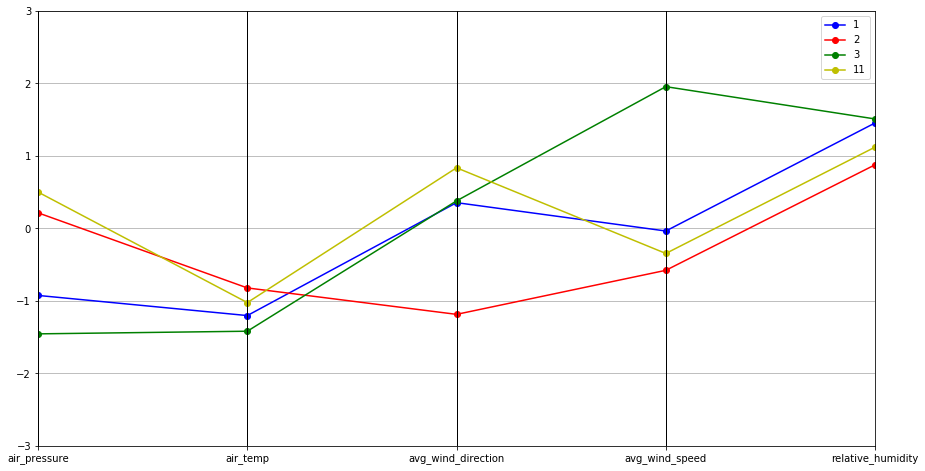

In [65]:
parallel_plot(P[P['relative_humidity'] > 0.5])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  after removing the cwd from sys.path.


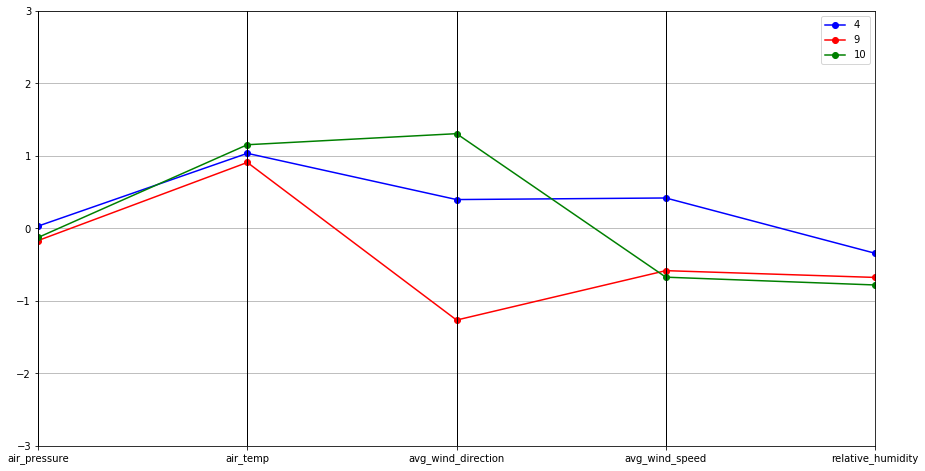

In [67]:
parallel_plot(P[P['air_temp'] > 0.5])